In [1]:
import pandas as pd
from pandas import Series,DataFrame
with open('含密度结构特征.csv',mode = 'r',encoding = 'UTF-8')as f:
    data = pd.read_csv(f,names = None)
    data = data[data['band_gap']<9]
data

,Formula,band_gap,MP ID,density,vpa,packing fraction
0,Ba2CuGe2O7,0.196,mp-22067,4.845679,17.005026,0.569741
1,EuLi2GeS4,0.205,mp-629443,3.652473,20.841910,0.461800
2,BaCu2GeSe4,0.356,mp-17252,5.260127,25.763737,0.465312
3,BaAg2SnS4,0.367,mp-555166,4.789230,26.005715,0.506954
4,SrCu2SnS4,0.403,mp-16988,4.228700,22.661840,0.461390
...,...,...,...,...,...,...
305,B2S2O9,6.695,mp-1019509,2.710548,10.826740,0.153931
306,BHO2,7.073,mp-721851,2.430435,7.484367,0.148558
307,SrB4O7,7.119,mp-1020670,3.258865,10.312337,0.405126
308,LiBO2,7.183,mp-14232,2.902265,7.116265,0.602565


In [2]:
from matminer.featurizers.conversions import StrToComposition
data1 = StrToComposition().featurize_dataframe(data, 'Formula')
data1.head()

StrToComposition:   0%|          | 0/310 [00:00<?, ?it/s]

,Formula,band_gap,MP ID,density,vpa,packing fraction,composition
0,Ba2CuGe2O7,0.196,mp-22067,4.845679,17.005026,0.569741,"(Ba, Cu, Ge, O)"
1,EuLi2GeS4,0.205,mp-629443,3.652473,20.841910,0.461800,"(Eu, Li, Ge, S)"
2,BaCu2GeSe4,0.356,mp-17252,5.260127,25.763737,0.465312,"(Ba, Cu, Ge, Se)"
3,BaAg2SnS4,0.367,mp-555166,4.789230,26.005715,0.506954,"(Ba, Ag, Sn, S)"
4,SrCu2SnS4,0.403,mp-16988,4.228700,22.661840,0.461390,"(Sr, Cu, Sn, S)"


In [3]:
from matminer.featurizers.composition.element import BandCenter
data2 = BandCenter().featurize_dataframe(data1 , 'composition',ignore_errors=True)
data2.head()

BandCenter:   0%|          | 0/310 [00:00<?, ?it/s]

,Formula,band_gap,MP ID,density,vpa,packing fraction,composition,band center
0,Ba2CuGe2O7,0.196,mp-22067,4.845679,17.005026,0.569741,"(Ba, Cu, Ge, O)",5.588313
1,EuLi2GeS4,0.205,mp-629443,3.652473,20.841910,0.461800,"(Eu, Li, Ge, S)",4.570865
2,BaCu2GeSe4,0.356,mp-17252,5.260127,25.763737,0.465312,"(Ba, Cu, Ge, Se)",4.826478
3,BaAg2SnS4,0.367,mp-555166,4.789230,26.005715,0.506954,"(Ba, Ag, Sn, S)",4.901970
4,SrCu2SnS4,0.403,mp-16988,4.228700,22.661840,0.461390,"(Sr, Cu, Sn, S)",4.955780


In [4]:
from matminer.featurizers.composition.orbital import ValenceOrbital
data3 = ValenceOrbital().featurize_dataframe(data2, 'composition',ignore_errors=True)
data3.head()

ValenceOrbital:   0%|          | 0/310 [00:00<?, ?it/s]

,Formula,band_gap,MP ID,density,vpa,packing fraction,composition,band center,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,Ba2CuGe2O7,0.196,mp-22067,4.845679,17.005026,0.569741,"(Ba, Cu, Ge, O)",5.588313,1.916667,2.666667,2.50,0.000,0.270588,0.376471,0.352941,0.000000
1,EuLi2GeS4,0.205,mp-629443,3.652473,20.841910,0.461800,"(Eu, Li, Ge, S)",4.570865,1.750000,2.250000,1.25,0.875,0.285714,0.367347,0.204082,0.142857
2,BaCu2GeSe4,0.356,mp-17252,5.260127,25.763737,0.465312,"(Ba, Cu, Ge, Se)",4.826478,1.750000,2.250000,8.75,0.000,0.137255,0.176471,0.686275,0.000000
3,BaAg2SnS4,0.367,mp-555166,4.789230,26.005715,0.506954,"(Ba, Ag, Sn, S)",4.901970,1.750000,2.250000,3.75,0.000,0.225806,0.290323,0.483871,0.000000
4,SrCu2SnS4,0.403,mp-16988,4.228700,22.661840,0.461390,"(Sr, Cu, Sn, S)",4.955780,1.750000,2.250000,3.75,0.000,0.225806,0.290323,0.483871,0.000000


In [5]:
from matminer.featurizers.composition.element import TMetalFraction
data4 = TMetalFraction().featurize_dataframe(data3 , 'composition',ignore_errors=True)
data4.head()

TMetalFraction:   0%|          | 0/310 [00:00<?, ?it/s]

,Formula,band_gap,MP ID,density,vpa,packing fraction,composition,band center,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,transition metal fraction
0,Ba2CuGe2O7,0.196,mp-22067,4.845679,17.005026,0.569741,"(Ba, Cu, Ge, O)",5.588313,1.916667,2.666667,2.50,0.000,0.270588,0.376471,0.352941,0.000000,0.083333
1,EuLi2GeS4,0.205,mp-629443,3.652473,20.841910,0.461800,"(Eu, Li, Ge, S)",4.570865,1.750000,2.250000,1.25,0.875,0.285714,0.367347,0.204082,0.142857,0.000000
2,BaCu2GeSe4,0.356,mp-17252,5.260127,25.763737,0.465312,"(Ba, Cu, Ge, Se)",4.826478,1.750000,2.250000,8.75,0.000,0.137255,0.176471,0.686275,0.000000,0.250000
3,BaAg2SnS4,0.367,mp-555166,4.789230,26.005715,0.506954,"(Ba, Ag, Sn, S)",4.901970,1.750000,2.250000,3.75,0.000,0.225806,0.290323,0.483871,0.000000,0.250000
4,SrCu2SnS4,0.403,mp-16988,4.228700,22.661840,0.461390,"(Sr, Cu, Sn, S)",4.955780,1.750000,2.250000,3.75,0.000,0.225806,0.290323,0.483871,0.000000,0.250000


In [6]:
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name = 'magpie')
data5 = ep_feat.featurize_dataframe(data4, col_id = 'composition')
data5

ElementProperty:   0%|          | 0/310 [00:00<?, ?it/s]

,Formula,band_gap,MP ID,density,vpa,packing fraction,composition,band center,avg s valence electrons,avg p valence electrons,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ba2CuGe2O7,0.196,mp-22067,4.845679,17.005026,0.569741,"(Ba, Cu, Ge, O)",5.588313,1.916667,2.666667,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,101.416667,104.319444,12.0
1,EuLi2GeS4,0.205,mp-629443,3.652473,20.841910,0.461800,"(Eu, Li, Ge, S)",4.570865,1.750000,2.250000,...,0.0,0.0,0.0,0.0,70.0,229.0,159.0,149.000000,79.000000,70.0
2,BaCu2GeSe4,0.356,mp-17252,5.260127,25.763737,0.465312,"(Ba, Cu, Ge, Se)",4.826478,1.750000,2.250000,...,0.0,0.0,0.0,0.0,14.0,229.0,215.0,120.000000,106.000000,14.0
3,BaAg2SnS4,0.367,mp-555166,4.789230,26.005715,0.506954,"(Ba, Ag, Sn, S)",4.901970,1.750000,2.250000,...,0.0,0.0,0.0,0.0,70.0,229.0,159.0,137.500000,67.500000,70.0
4,SrCu2SnS4,0.403,mp-16988,4.228700,22.661840,0.461390,"(Sr, Cu, Sn, S)",4.955780,1.750000,2.250000,...,0.0,0.0,0.0,0.0,70.0,225.0,155.0,137.000000,67.000000,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,B2S2O9,6.695,mp-1019509,2.710548,10.826740,0.153931,"(B, S, O)",6.710511,2.000000,3.538462,...,0.0,0.0,0.0,0.0,12.0,166.0,154.0,44.615385,45.159763,12.0
306,BHO2,7.073,mp-721851,2.430435,7.484367,0.148558,"(B, H, O)",6.467133,1.750000,2.250000,...,0.0,0.0,0.0,0.0,12.0,194.0,182.0,96.000000,84.000000,12.0
307,SrB4O7,7.119,mp-1020670,3.258865,10.312337,0.405126,"(Sr, B, O)",5.764126,2.000000,2.666667,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,81.083333,80.597222,12.0
308,LiBO2,7.183,mp-14232,2.902265,7.116265,0.602565,"(Li, B, O)",5.202171,1.750000,2.250000,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,104.750000,92.750000,12.0


In [7]:
exclude = ['Formula', 'composition','MP ID']#, 'composition_oxid'
data_re = data5.drop(exclude, axis = 1)
data_re.head()

,band_gap,density,vpa,packing fraction,band center,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,0.196,4.845679,17.005026,0.569741,5.588313,1.916667,2.666667,2.50,0.000,0.270588,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,101.416667,104.319444,12.0
1,0.205,3.652473,20.841910,0.461800,4.570865,1.750000,2.250000,1.25,0.875,0.285714,...,0.0,0.0,0.0,0.0,70.0,229.0,159.0,149.000000,79.000000,70.0
2,0.356,5.260127,25.763737,0.465312,4.826478,1.750000,2.250000,8.75,0.000,0.137255,...,0.0,0.0,0.0,0.0,14.0,229.0,215.0,120.000000,106.000000,14.0
3,0.367,4.789230,26.005715,0.506954,4.901970,1.750000,2.250000,3.75,0.000,0.225806,...,0.0,0.0,0.0,0.0,70.0,229.0,159.0,137.500000,67.500000,70.0
4,0.403,4.228700,22.661840,0.461390,4.955780,1.750000,2.250000,3.75,0.000,0.225806,...,0.0,0.0,0.0,0.0,70.0,225.0,155.0,137.000000,67.000000,70.0


In [8]:
data_VT = data_re

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.96 * (1 - .96)))
sel.fit_transform(data_VT)
data_VT.shape

(310, 146)

In [9]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 35


E:\an\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


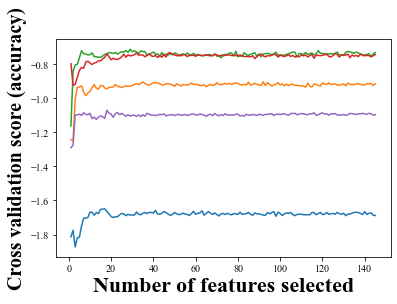

In [10]:
excluded = ['band_gap']
X = data_re.drop(excluded, axis = 1)
y = data_re['band_gap'].values
y = [ float(i) for i in y]
y = np.array(y,dtype=np.float32)
min_features_to_select = 1
rfr = RandomForestRegressor(random_state=1)
rfecv = RFECV(
    estimator=rfr,
    scoring = 'neg_root_mean_squared_error',
    n_jobs= -1,
    cv = 5
)
rfecv.fit(X,y)
print("Optimal number of features : %d" % rfecv.n_features_)
plt.rcParams['font.sans-serif']=['Times New Roman']

plt.figure()
plt.xlabel("Number of features selected",fontsize = 22,fontproperties={'weight': 'bold'})
plt.ylabel("Cross validation score (accuracy)",fontsize = 20,fontproperties={'weight': 'bold'})
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.savefig('rfecv.png', dpi=600,format = 'png',bbox_inches='tight')
plt.show()

In [11]:
rfecv.cv_results_

{'mean_test_score': array([-1.26093707, -1.21253349, -1.13928195, -1.10580424, -1.08828064,
        -1.06325624, -1.06251303, -1.06201707, -1.0585258 , -1.0503768 ,
        -1.05214095, -1.05300584, -1.05584036, -1.05426065, -1.04387414,
        -1.04064716, -1.04147397, -1.03091805, -1.03761764, -1.04602725,
        -1.04924012, -1.04105784, -1.04414779, -1.04231208, -1.03667572,
        -1.03536346, -1.03987557, -1.0363706 , -1.03652252, -1.03683327,
        -1.03397844, -1.0293979 , -1.03628999, -1.03408684, -1.02919631,
        -1.03391298, -1.03581347, -1.03316693, -1.03433667, -1.03264029,
        -1.03121833, -1.03772939, -1.03857617, -1.03670943, -1.03343905,
        -1.03764954, -1.03420131, -1.03489386, -1.03670878, -1.03605522,
        -1.03530081, -1.03872174, -1.04063523, -1.03518236, -1.0365841 ,
        -1.03891269, -1.03905683, -1.03467424, -1.03127808, -1.03943642,
        -1.03620674, -1.03675524, -1.03570244, -1.04074265, -1.04066422,
        -1.03570891, -1.03573335

In [12]:
X_rfecv = rfecv.transform(X)

df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking')

df_feature_opt = df_features[df_features['support']==True]

df_feature_opt_num = df_feature_opt['feature']

df_feature_opt_feature = []
for i in df_feature_opt_num:
    df_feature_opt_feature.append(X.columns[i])

C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features

C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features

C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features

C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features

C:\Users\Admin\AppData\Local\Temp\ipykernel_7980\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)


In [13]:
df_feature_opt_feature

['density',
 'vpa',
 'packing fraction',
 'avg d valence electrons',
 'frac s valence electrons',
 'frac p valence electrons',
 'frac d valence electrons',
 'transition metal fraction',
 'MagpieData mean Number',
 'MagpieData avg_dev Number',
 'MagpieData avg_dev MendeleevNumber',
 'MagpieData mean AtomicWeight',
 'MagpieData avg_dev AtomicWeight',
 'MagpieData mean MeltingT',
 'MagpieData avg_dev MeltingT',
 'MagpieData mode MeltingT',
 'MagpieData avg_dev Column',
 'MagpieData mean Row',
 'MagpieData avg_dev Row',
 'MagpieData range CovalentRadius',
 'MagpieData mean CovalentRadius',
 'MagpieData avg_dev CovalentRadius',
 'MagpieData mode CovalentRadius',
 'MagpieData range Electronegativity',
 'MagpieData mean Electronegativity',
 'MagpieData avg_dev Electronegativity',
 'MagpieData mean NdValence',
 'MagpieData avg_dev NdValence',
 'MagpieData avg_dev NValence',
 'MagpieData avg_dev NUnfilled',
 'MagpieData range GSvolume_pa',
 'MagpieData mean GSvolume_pa',
 'MagpieData mean GSban

In [14]:
df_feature_opt_feature1 = df_feature_opt_feature[0:20]
df_feature_opt_feature1

['density',
 'vpa',
 'packing fraction',
 'avg d valence electrons',
 'frac s valence electrons',
 'frac p valence electrons',
 'frac d valence electrons',
 'transition metal fraction',
 'MagpieData mean Number',
 'MagpieData avg_dev Number',
 'MagpieData avg_dev MendeleevNumber',
 'MagpieData mean AtomicWeight',
 'MagpieData avg_dev AtomicWeight',
 'MagpieData mean MeltingT',
 'MagpieData avg_dev MeltingT',
 'MagpieData mode MeltingT',
 'MagpieData avg_dev Column',
 'MagpieData mean Row',
 'MagpieData avg_dev Row',
 'MagpieData range CovalentRadius']

In [15]:
data_corr = data_VT[df_feature_opt_feature1]
data_corr_for_corr = data_corr.corr()
data_corr_for_corr.style.applymap(lambda v
                             : 'background-color: %s' %'#FFCCFF' if v>abs(0.8) 
                             else'background-color: %s'% '')

,density,vpa,packing fraction,avg d valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,transition metal fraction,MagpieData mean Number,MagpieData avg_dev Number,MagpieData avg_dev MendeleevNumber,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData avg_dev Column,MagpieData mean Row,MagpieData avg_dev Row,MagpieData range CovalentRadius
density,1.000000,0.229549,0.174670,0.446121,-0.661237,-0.630893,0.456040,0.148872,0.666647,0.855564,-0.129836,0.684282,0.857834,-0.084170,-0.177531,0.104092,-0.336346,0.549893,0.736654,-0.067261
vpa,0.229549,1.000000,0.026824,0.768697,-0.672596,-0.669087,0.743594,0.211219,0.860093,0.248813,0.270799,0.843248,0.271670,-0.131183,-0.640567,0.824744,-0.018857,0.911993,0.088016,-0.222886
packing fraction,0.174670,0.026824,1.000000,-0.156963,0.144473,0.103931,-0.141456,0.044001,0.088031,0.235070,0.666541,0.089380,0.222904,0.032995,0.062827,-0.163207,0.362655,0.163039,0.438731,0.564572
avg d valence electrons,0.446121,0.768697,-0.156963,1.000000,-0.864768,-0.875378,0.942594,0.295982,0.826891,0.246982,-0.002237,0.819956,0.262217,-0.107611,-0.550964,0.740090,-0.180478,0.804922,0.046004,-0.412224
frac s valence electrons,-0.661237,-0.672596,0.144473,-0.864768,1.000000,0.893311,-0.893340,-0.287168,-0.831564,-0.533419,0.068202,-0.826940,-0.543453,0.261241,0.589643,-0.582904,0.327756,-0.777576,-0.311156,0.399547
frac p valence electrons,-0.630893,-0.669087,0.103931,-0.875378,0.893311,1.000000,-0.913952,-0.290076,-0.834873,-0.515187,0.023649,-0.831155,-0.527255,0.030529,0.459932,-0.660336,0.150246,-0.793093,-0.284171,0.412766
frac d valence electrons,0.456040,0.743594,-0.141456,0.942594,-0.893340,-0.913952,1.000000,0.337608,0.791936,0.314789,0.025313,0.776414,0.322849,-0.121652,-0.582287,0.740655,-0.181706,0.802062,0.131053,-0.431943
transition metal fraction,0.148872,0.211219,0.044001,0.295982,-0.287168,-0.290076,0.337608,1.000000,0.265812,0.029317,0.074814,0.250482,0.033337,0.168452,-0.043803,0.240867,0.051581,0.308529,0.048518,-0.039053
MagpieData mean Number,0.666647,0.860093,0.088031,0.826891,-0.831564,-0.834873,0.791936,0.265812,1.000000,0.602236,0.129844,0.998510,0.622400,-0.130688,-0.561806,0.673266,-0.157199,0.968005,0.420876,-0.208035
MagpieData avg_dev Number,0.855564,0.248813,0.235070,0.246982,-0.533419,-0.515187,0.314789,0.029317,0.602236,1.000000,-0.015456,0.620974,0.998568,-0.186622,-0.226907,0.048511,-0.202120,0.490421,0.905140,0.039484


In [16]:
data_3 = data_VT[df_feature_opt_feature]
data_3

,density,vpa,packing fraction,avg d valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,transition metal fraction,MagpieData mean Number,MagpieData avg_dev Number,...,MagpieData avg_dev Electronegativity,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData avg_dev NValence,MagpieData avg_dev NUnfilled,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData mean GSbandgap,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber
0,4.845679,17.005026,0.569741,2.50,0.270588,0.376471,0.352941,0.083333,21.750000,16.041667,...,0.923611,2.50,3.7500,2.958333,0.791667,54.485000,20.666250,0.063833,101.416667,104.319444
1,3.652473,20.841910,0.461800,1.25,0.285714,0.367347,0.204082,0.000000,20.625000,13.437500,...,0.664531,1.25,2.1875,2.687500,1.437500,19.866667,24.474896,1.148875,149.000000,79.000000
2,5.260127,25.763737,0.465312,8.75,0.137255,0.176471,0.686275,0.250000,35.250000,5.187500,...,0.437500,8.75,2.1875,3.562500,0.812500,52.520000,26.551875,0.447375,120.000000,106.000000
3,4.789230,26.005715,0.506954,3.75,0.225806,0.290323,0.483871,0.250000,33.000000,17.000000,...,0.451250,3.75,4.6875,3.187500,0.812500,47.260000,29.085313,1.101000,137.500000,67.500000
4,4.228700,22.661840,0.461390,3.75,0.225806,0.290323,0.483871,0.250000,26.250000,10.250000,...,0.451250,3.75,4.6875,3.187500,0.812500,43.160000,26.600313,1.101000,137.000000,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2.710548,10.826740,0.153931,0.00,0.361111,0.638889,0.000000,0.000000,8.769231,2.224852,...,0.481420,0.00,0.0000,0.781065,0.781065,18.614375,11.374135,0.573231,44.615385,45.159763
306,2.430435,7.484367,0.148558,0.00,0.437500,0.562500,0.000000,0.000000,5.500000,2.500000,...,0.660000,0.00,0.0000,2.000000,1.250000,2.490000,7.999375,2.344250,96.000000,84.000000
307,3.258865,10.312337,0.405126,0.00,0.428571,0.571429,0.000000,0.000000,9.500000,4.750000,...,0.786528,0.00,0.0000,1.555556,1.444444,47.057500,12.221250,0.508000,81.083333,80.597222
308,2.902265,7.116265,0.602565,0.00,0.437500,0.562500,0.000000,0.000000,6.000000,2.000000,...,0.965000,0.00,0.0000,2.000000,1.250000,9.420833,10.493958,0.381000,104.750000,92.750000


In [17]:
data_corr

,density,vpa,packing fraction,avg d valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,transition metal fraction,MagpieData mean Number,MagpieData avg_dev Number,MagpieData avg_dev MendeleevNumber,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData avg_dev Column,MagpieData mean Row,MagpieData avg_dev Row,MagpieData range CovalentRadius
0,4.845679,17.005026,0.569741,2.50,0.270588,0.376471,0.352941,0.083333,21.750000,16.041667,21.708333,49.622983,39.227514,513.680833,535.360972,54.80,3.958333,3.166667,1.361111,149.0
1,3.652473,20.841910,0.461800,1.25,0.285714,0.367347,0.204082,0.000000,20.625000,13.437500,36.187500,45.843250,33.229375,595.902500,278.648750,388.36,6.531250,3.250000,0.875000,93.0
2,5.260127,25.763737,0.465312,8.75,0.137255,0.176471,0.686275,0.250000,35.250000,5.187500,19.375000,81.612375,13.928656,862.867500,368.867500,494.00,3.562500,4.250000,0.437500,95.0
3,4.789230,26.005715,0.506954,3.75,0.225806,0.290323,0.483871,0.250000,33.000000,17.000000,18.781250,75.004175,42.939175,691.047500,349.179375,388.36,3.562500,4.125000,1.125000,110.0
4,4.228700,22.661840,0.461390,3.75,0.225806,0.290323,0.483871,0.250000,26.250000,10.250000,19.250000,57.710250,25.645250,728.007500,395.379375,388.36,3.562500,3.750000,0.750000,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2.710548,10.826740,0.153931,0.00,0.361111,0.638889,0.000000,0.000000,8.769231,2.224852,3.952663,17.672815,4.428364,458.916923,581.256331,54.80,0.781065,2.153846,0.260355,39.0
306,2.430435,7.484367,0.148558,0.00,0.437500,0.562500,0.000000,0.000000,5.500000,2.500000,6.250000,10.954435,5.044965,617.902500,865.048750,54.80,5.250000,1.750000,0.375000,53.0
307,3.258865,10.312337,0.405126,0.00,0.428571,0.571429,0.000000,0.000000,9.500000,4.750000,13.513889,20.238317,11.230281,902.133333,988.555556,54.80,2.527778,2.250000,0.458333,129.0
308,2.902265,7.116265,0.602565,0.00,0.437500,0.562500,0.000000,0.000000,6.000000,2.000000,30.375000,12.437700,3.561700,727.822500,810.088750,54.80,5.250000,2.000000,0.000000,62.0


In [18]:
outputpath='C:/Users/Admin/Desktop/2345.csv'
data_corr.to_csv(outputpath,sep=',',index=False,header=True)

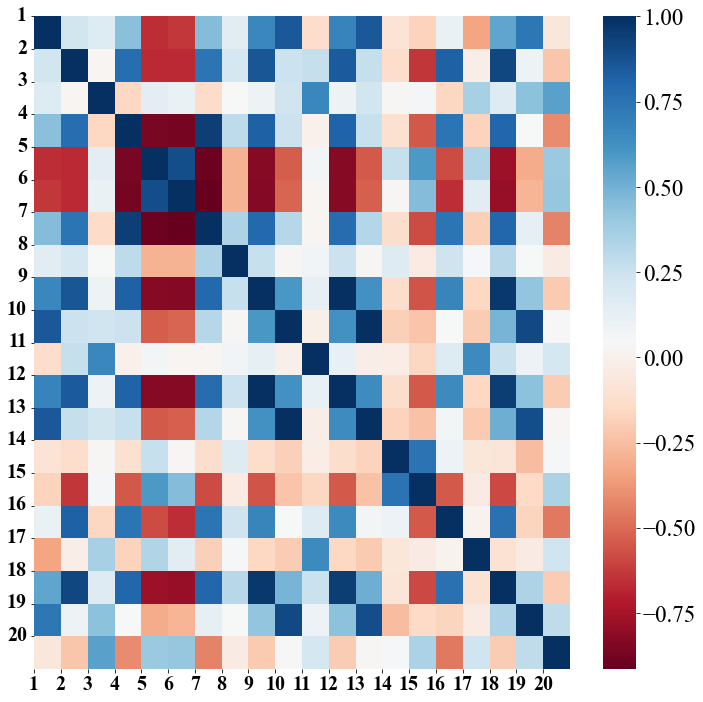

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
ax = sns.heatmap(data_corr.corr(), cmap='RdBu')
num_labels = len(data_corr.columns)

# 获取颜色条对象
cbar = ax.collections[0].colorbar

# 设置颜色条标签的字体大小
cbar.ax.tick_params(labelsize=23)

# 设置横轴和纵轴的刻度位置和标签
ax.set_xticks(range(num_labels))
ax.set_yticks(range(num_labels))

# 设置横轴和纵轴的标签内容，使用数字排序
ax.set_xticklabels(range(1, num_labels + 1),rotation = 0,fontproperties={'weight': 'bold'},fontsize=20)
ax.set_yticklabels(range(1, num_labels + 1),fontproperties={'weight': 'bold'},fontsize=20)

plt.savefig('pearson热能图.png', dpi=600)

In [20]:
list_for = df_feature_opt_feature+['band_gap']
data_corr_for = data_VT[list_for]
data_corr_for = data_corr_for.apply(pd.to_numeric)  
list_corr = data_corr_for.corr()['band_gap'].abs().sort_values(ascending=False)
list_corr

band_gap                                1.000000
MagpieData mean Row                     0.825915
frac d valence electrons                0.814830
frac p valence electrons                0.807470
MagpieData mean Number                  0.785350
MagpieData mean CovalentRadius          0.770352
MagpieData mean AtomicWeight            0.767240
MagpieData avg_dev NdValence            0.757857
frac s valence electrons                0.742821
MagpieData mean NdValence               0.734174
avg d valence electrons                 0.734174
vpa                                     0.732438
MagpieData mode CovalentRadius          0.699896
MagpieData mode MeltingT                0.689548
MagpieData mean GSvolume_pa             0.666744
MagpieData mean Electronegativity       0.612828
MagpieData avg_dev NValence             0.551274
MagpieData range Electronegativity      0.544415
MagpieData avg_dev MeltingT             0.540531
MagpieData avg_dev Electronegativity    0.513535
density             

In [21]:
data5['vpa']

0      17.005026
1      20.841910
2      25.763737
3      26.005715
4      22.661840
         ...    
305    10.826740
306     7.484367
307    10.312337
308     7.116265
309    13.798719
Name: vpa, Length: 310, dtype: float64

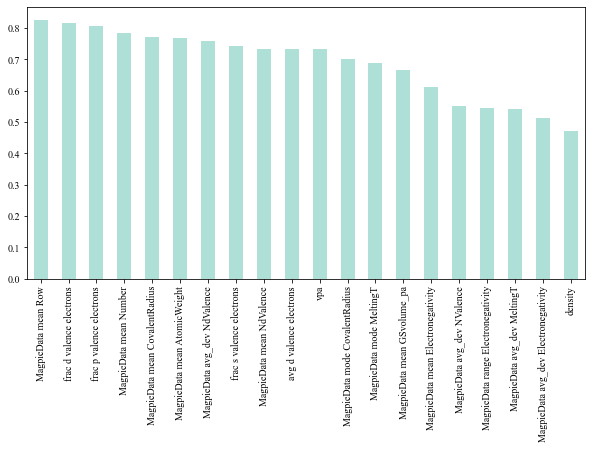

In [22]:
ax = list_corr.drop('band_gap')[0:20].plot(kind = 'bar', rot = 90, alpha=0.7,colormap = 'Set3', figsize = (10,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.savefig('pearson系数图', dpi=300)

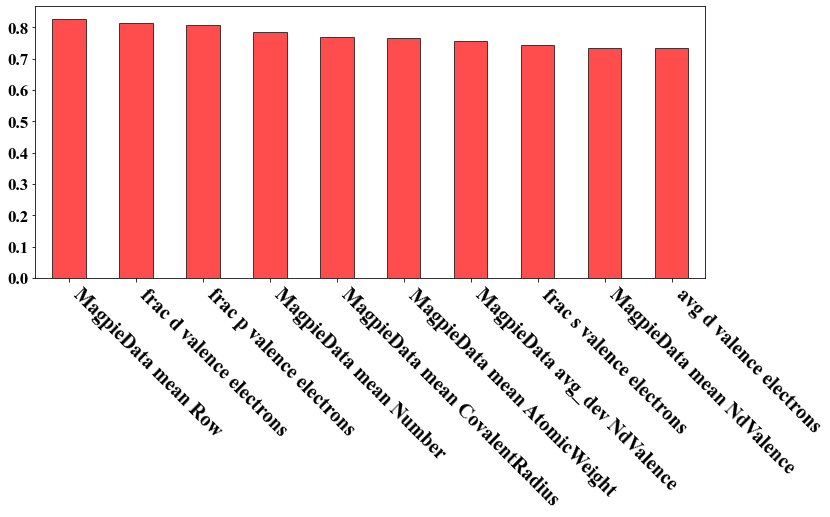

In [23]:
list_corr.drop('band_gap')[0:10].plot(kind = 'bar', rot = 90, colormap ='flag', edgecolor = 'k', alpha=0.7, figsize = (12,5))
plt.xticks(rotation = -45, fontsize = 20, ha = 'left',fontproperties={'weight': 'bold'})
plt.yticks(fontsize = 17,fontproperties={'weight': 'bold'})
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.savefig('train3.png', dpi = 600,format = 'png',transparent = True,bbox_inches='tight')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor(random_state=1)
classifier.fit(data_VT[df_feature_opt_feature], y)

names = data_VT[df_feature_opt_feature].columns
list_score = sorted(zip(map(lambda x: round(x, 4), classifier.feature_importances_), names), reverse=True)
list_name = []
score = []
score_others = 1-np.sum(score)
score_str = []
for i in list_score:
    list_name.append(i[1])
    score.append(i[0])
    
#score.append(1-np.sum(score))
#list_name.append('others')

for i in score:
    score_str.append("%.2f%%" % (i * 100))
pie = pd.Series(list_name,score)

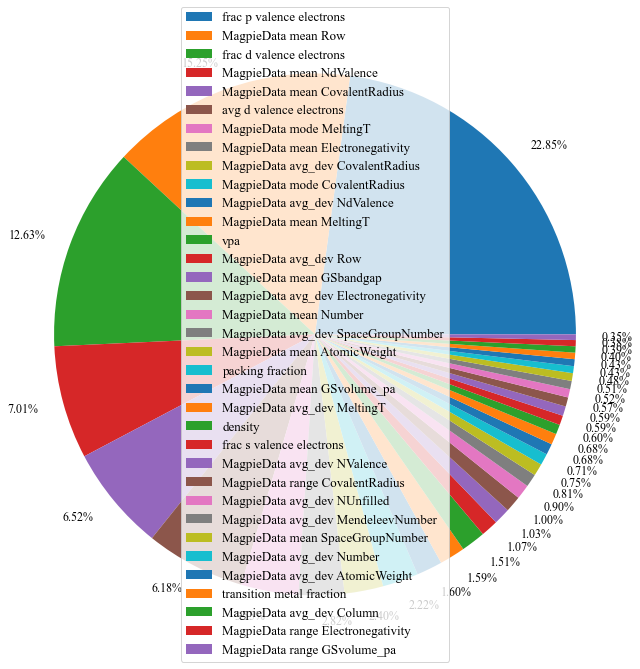

In [25]:
import matplotlib.pyplot as plt

plt.pie(score,labels=score_str, radius=3, textprops={'fontsize': 12})
plt.legend(list_name, loc = 'center', fontsize=13)
plt.savefig('123.png', dpi=600, format='png', transparent=True, bbox_inches='tight')
plt.show()

In [26]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRFRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.2, random_state=22)
crossvalidation = KFold(n_splits = 10, shuffle = True,random_state = 1)

In [45]:
y_test

array([1.368, 3.518, 4.652, 4.677, 1.792, 2.836, 5.212, 3.563, 5.426,
       5.572, 4.08 , 2.434, 5.417, 3.543, 5.838, 3.638, 6.064, 1.815,
       5.705, 5.175, 3.337, 4.594, 0.973, 5.323, 1.541, 5.077, 6.151,
       0.859, 2.865, 3.484, 6.052, 3.756, 3.022, 1.383, 3.961, 2.731,
       4.261, 4.656, 4.531, 4.94 , 5.082, 2.746, 5.456, 4.96 , 3.833,
       2.061, 5.194, 4.938, 6.085, 4.079, 1.46 , 2.177, 2.258, 6.695,
       5.251, 3.025, 5.336, 1.918, 4.374, 5.305, 2.369, 5.095],
      dtype=float32)

In [27]:
rfr = RandomForestRegressor(random_state=2, max_features= 'sqrt',min_samples_leaf=2, min_samples_split=2, max_depth= 20)

xgb = XGBRFRegressor(random_state=8, max_depth=10, colsample_bytree=0.5, subsample=0.5, n_estimators=100,
                    gamma=0.1, min_child_weight=1)

r2_scores_rfr = cross_val_score(rfr, X_train, y_train, scoring = 'r2', cv = crossvalidation)
rmse_scores_rfr = cross_val_score(rfr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
NAE_scores_rfr = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_absolute_error', cv = crossvalidation)
print()
print('RFR train band_gap Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_rfr), np.mean(r2_scores_rfr)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_rfr), -np.mean(rmse_scores_rfr)))
print('Folds: %i, mean MAE: %3f' % (len(NAE_scores_rfr), -np.mean(NAE_scores_rfr)))
print()

r2_scores_xgb = cross_val_score(xgb, X_train, y_train, scoring = 'r2', cv = crossvalidation)
rmse_scores_xgb = cross_val_score(xgb, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
NAE_scores_xgb = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv = crossvalidation)
print()
print('XGB train band_gap Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_xgb), np.mean(r2_scores_xgb)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_xgb), -np.mean(rmse_scores_xgb)))
print('Folds: %i, mean MAE: %3f' % (len(NAE_scores_xgb), -np.mean(NAE_scores_xgb)))
print()

rfr_test = rfr.fit(X_train, y_train)


y_rfr_predtct = rfr.predict(X_test)


xgb_test = xgb.fit(X_train, y_train)
y_xgb_predtct = xgb.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_scores_rfr_test = r2_score(y_test, y_rfr_predtct)
rmse_scores_rfr_test = np.sqrt(mean_squared_error(y_test, y_rfr_predtct))
mae_scores_rfr_test = mean_absolute_error(y_test, y_rfr_predtct)

print()
print('RFR predict formation results:')
print('mean R2: %3f' % (r2_scores_rfr_test))
print('mean RMSE: %3f' % (rmse_scores_rfr_test))
print('mean MAE: %3f' % (mae_scores_rfr_test))
print()



r2_scores_xgb_test = r2_score(y_test, y_xgb_predtct)
rmse_scores_xgb_test = np.sqrt(mean_squared_error(y_test, y_xgb_predtct))
mae_scores_xgb_test = mean_absolute_error(y_test, y_xgb_predtct)

print()
print('XGB predict band_gap results:')
print('mean R2: %3f' % (r2_scores_xgb_test))
print('mean RMSE: %3f' % (rmse_scores_xgb_test))
print('mean MAE: %3f' % (mae_scores_xgb_test))
print()

gbr = GradientBoostingRegressor(random_state=13, criterion='squared_error', min_samples_leaf= 10, min_samples_split= 10, max_depth=3)
r2_scores_gbr = cross_val_score(gbr, X_train, y_train, scoring = 'r2', cv = crossvalidation)
rmse_scores_gbr = cross_val_score(gbr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
NAE_scores_gbr = cross_val_score(gbr, X_train, y_train, scoring='neg_mean_absolute_error', cv = crossvalidation)
print()
print('GBR train formation energy Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_gbr), np.mean(r2_scores_gbr)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_gbr), -np.mean(rmse_scores_gbr)))
print('Folds: %i, mean MAE: %3f' % (len(NAE_scores_gbr), -np.mean(NAE_scores_gbr)))
print()

gbr_test = gbr.fit(X_train, y_train)
y_gbr_predtct = gbr.predict(X_test)

r2_scores_gbr_test = r2_score(y_test, y_gbr_predtct)
rmse_scores_gbr_test = np.sqrt(mean_squared_error(y_test, y_gbr_predtct))
mae_scores_gbr_test = mean_absolute_error(y_test, y_gbr_predtct)

print()
print('GBR predict formation results:')
print('mean R2: %3f' % (r2_scores_gbr_test))
print('mean RMSE: %3f' % (rmse_scores_gbr_test))
print('mean MAE: %3f' % (mae_scores_gbr_test))
print()


RFR train band_gap Cross-validation results:
Folds: 10, mean R2: 0.828379
Folds: 10, mean RMSE: 0.637395
Folds: 10, mean MAE: 0.457055


XGB train band_gap Cross-validation results:
Folds: 10, mean R2: 0.819139
Folds: 10, mean RMSE: 0.656216
Folds: 10, mean MAE: 0.462659


RFR predict formation results:
mean R2: 0.822714
mean RMSE: 0.639000
mean MAE: 0.470573


XGB predict band_gap results:
mean R2: 0.807387
mean RMSE: 0.666049
mean MAE: 0.483227


GBR train formation energy Cross-validation results:
Folds: 10, mean R2: 0.828417
Folds: 10, mean RMSE: 0.630446
Folds: 10, mean MAE: 0.443622


GBR predict formation results:
mean R2: 0.793673
mean RMSE: 0.689353
mean MAE: 0.478571



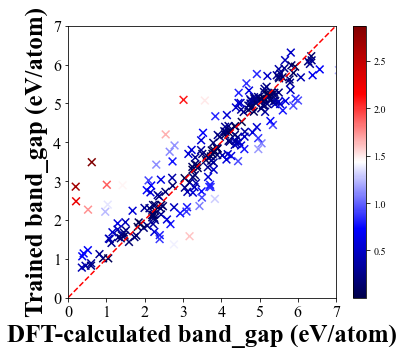

In [28]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

plt.rcParams['font.sans-serif']=['Times New Roman']
mpl.rcParams['lines.linestyle'] = '--'
colormap = cm.get_cmap('seismic')
plt.figure(figsize = (6,5))


s_x = np.linspace(0, 50, 100)
s_y = s_x
plt.plot(s_x, s_y, color = 'red')

plt.scatter([ float(i) for i in y_train], cross_val_predict(rfr, X_train, y_train, cv = crossvalidation),
            c= abs([ float(i) for i in y_train]-cross_val_predict(rfr, X_train, y_train, cv = crossvalidation))
           ,cmap=colormap,marker = 'x',s = 60)



#plt.legend(loc='upper left',title = 'RFR',prop={'size': 30, 'weight': 'bold'})
plt.xlabel('DFT-calculated band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.ylabel('Trained band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.colorbar()
plt.savefig('train rfr.png', dpi = 1000,bbox_inches='tight')
plt.show()

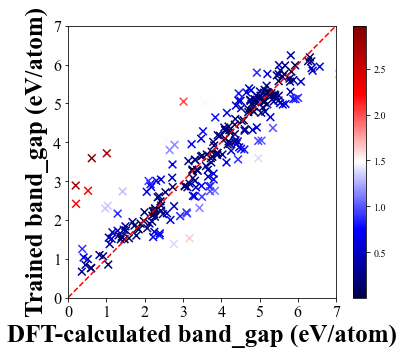

In [29]:
plt.rcParams['font.sans-serif']=['Times New Roman']
mpl.rcParams['lines.linestyle'] = '--'
colormap = cm.get_cmap('seismic')
plt.figure(figsize = (6,5))


s_x = np.linspace(0, 50, 100)
s_y = s_x
plt.plot(s_x, s_y, color = 'red')

plt.scatter([ float(i) for i in y_train], cross_val_predict(xgb, X_train, y_train, cv = crossvalidation),
            c= abs([ float(i) for i in y_train]-cross_val_predict(xgb, X_train, y_train, cv = crossvalidation))
           ,cmap=colormap,marker = 'x',s = 60)



#plt.legend(loc='upper left',title = 'XGB')
plt.xlabel('DFT-calculated band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.ylabel('Trained band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.colorbar()
plt.savefig('train xgb.png', dpi = 1000,bbox_inches='tight')
plt.show()

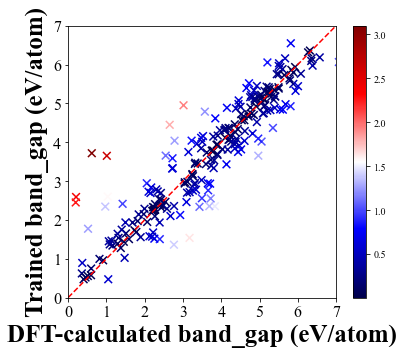

In [30]:
plt.rcParams['font.sans-serif']=['Times New Roman']
mpl.rcParams['lines.linestyle'] = '--'
colormap = cm.get_cmap('seismic')
plt.figure(figsize = (6,5))


s_x = np.linspace(0, 50, 100)
s_y = s_x
plt.plot(s_x, s_y, color = 'red')

plt.scatter([ float(i) for i in y_train], cross_val_predict(gbr, X_train, y_train, cv = crossvalidation),
            c= abs([ float(i) for i in y_train]-cross_val_predict(gbr, X_train, y_train, cv = crossvalidation))
           ,cmap=colormap,marker = 'x',s = 60)



#plt.legend(loc='upper left',title = 'GBR')
plt.xlabel('DFT-calculated band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.ylabel('Trained band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.colorbar()
plt.savefig('train gbr.png', dpi = 1000,bbox_inches='tight')
plt.show()

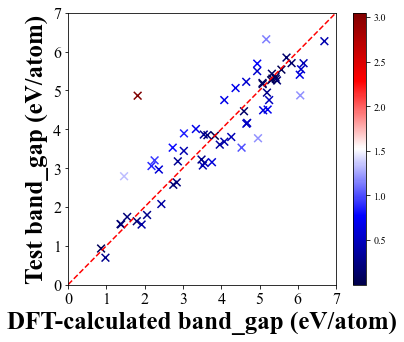

In [31]:
plt.rcParams['font.sans-serif']=['Times New Roman']
mpl.rcParams['lines.linestyle'] = '--'
colormap = cm.get_cmap('seismic')
plt.figure(figsize = (6,5))


s_x = np.linspace(0, 50, 100)
s_y = s_x
plt.plot(s_x, s_y, color = 'red')

plt.scatter([ float(i) for i in y_test], [ float(i) for i in y_xgb_predtct],
            c= abs([ float(i) for i in y_test]-np.array([ float(i) for i in y_xgb_predtct]))
           ,cmap=colormap,marker = 'x',s = 60)



#plt.legend(loc='upper left',title = 'XGB')
plt.xlabel('DFT-calculated band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.ylabel('Test band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.colorbar()
plt.savefig('test xgb.png', dpi = 1000,bbox_inches='tight')
plt.show()

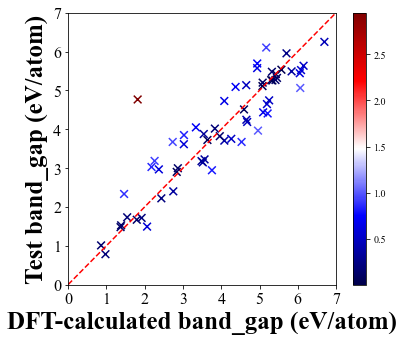

In [32]:
plt.rcParams['font.sans-serif']=['Times New Roman']
mpl.rcParams['lines.linestyle'] = '--'
colormap = cm.get_cmap('seismic')
plt.figure(figsize = (6,5))


s_x = np.linspace(0, 50, 100)
s_y = s_x
plt.plot(s_x, s_y, color = 'red')

plt.scatter([ float(i) for i in y_test], [ float(i) for i in y_rfr_predtct],
            c= abs([ float(i) for i in y_test]-np.array([ float(i) for i in y_rfr_predtct]))
           ,cmap=colormap,marker = 'x',s = 60)



#plt.legend(loc='upper left',title = 'RFR')
plt.xlabel('DFT-calculated band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.ylabel('Test band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.colorbar()
plt.savefig('test rfr.png', dpi = 1000,bbox_inches='tight')
plt.show()

In [46]:
y_rfr_predtct

array([1.47775461, 3.1448249 , 5.13388086, 4.18629463, 1.66757198,
       2.89994663, 4.4051131 , 3.22227638, 5.41982288, 5.53162743,
       3.70518284, 2.21931105, 5.26699561, 3.875386  , 5.4886888 ,
       3.72203765, 5.06139278, 4.76531528, 5.95367993, 6.10264681,
       4.04694135, 4.50883281, 0.78053712, 5.47834452, 1.73102344,
       5.11022191, 5.63357955, 1.00716387, 2.99413183, 3.17811984,
       5.44163584, 2.94281959, 3.61317661, 1.52420964, 3.81997926,
       3.67154231, 3.75168499, 4.2429034 , 3.67154231, 5.69185724,
       5.19865165, 2.39917524, 5.32061479, 3.96289496, 4.01523784,
       1.490708  , 4.64638367, 5.57325514, 5.52220133, 4.72684362,
       2.33191926, 3.0265871 , 3.18318393, 6.24876228, 4.74258211,
       3.848291  , 5.25405773, 1.71470936, 5.08917051, 5.26385248,
       2.96495364, 4.43417464])

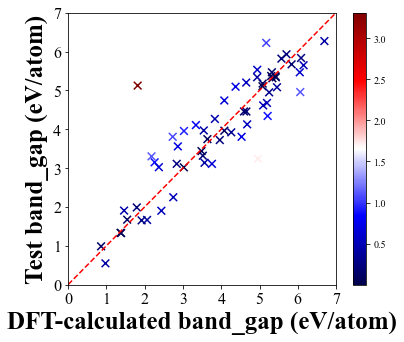

In [33]:
plt.rcParams['font.sans-serif']=['Times New Roman']
mpl.rcParams['lines.linestyle'] = '--'
colormap = cm.get_cmap('seismic')
plt.figure(figsize = (6,5))


s_x = np.linspace(0, 50, 100)
s_y = s_x
plt.plot(s_x, s_y, color = 'red')

plt.scatter([ float(i) for i in y_test], [ float(i) for i in y_gbr_predtct],
            c= abs([ float(i) for i in y_test]-np.array([ float(i) for i in y_gbr_predtct]))
           ,cmap=colormap,marker = 'x',s = 60)



#plt.legend(loc='upper left',title = 'GBR')
plt.xlabel('DFT-calculated band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.ylabel('Test band_gap (eV/atom)',fontproperties={'weight': 'bold'},fontsize = 25)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.colorbar()
plt.savefig('test gbr.png', dpi =1000,bbox_inches='tight')
plt.show()

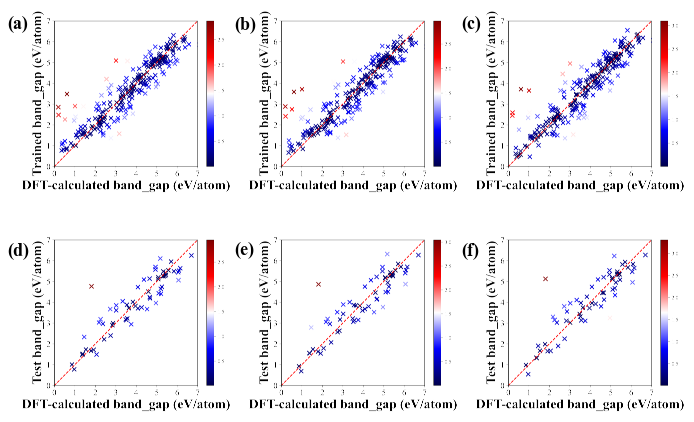

In [34]:
import matplotlib.image as mpimg
import string

# 创建一个2x3的子图布局
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 定义六张图片的文件名（假设图片都在当前目录下）
image_files = ['train rfr.png', 'train xgb.png', 'train gbr.png', 'test rfr.png', 'test xgb.png', 'test gbr.png']
letters = iter(string.ascii_lowercase)

# 循环遍历图片文件并将它们显示在子图中
for i, ax in enumerate(axes.flat):
    if i < len(image_files):
        img = mpimg.imread(image_files[i])  # 读取图片文件
        ax.imshow(img)  # 显示图片
        ax.axis('off')  # 隐藏坐标轴
        letter = next(letters)
        ax.text(-0.05, 0.95, f'({letter})', transform=ax.transAxes, fontsize=18,
                verticalalignment='top', color='black', weight='bold')
        
    else:
        ax.axis('off')  # 如果没有足够的图片，隐藏多余的子图

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# 保存或显示大图
plt.savefig('combined_image.png',dpi =1000, bbox_inches='tight')  # 保存大图为文件
plt.show()  # 如果要在窗口中显示大图，请取消注释此行


In [35]:
import joblib

# 假设model是你已经训练好的模型
joblib.dump(rfr, 'trained_model.pkl')

['trained_model.pkl']

In [36]:
with open('所有需要预测的数据.csv',mode = 'r',encoding = 'UTF-8')as f:
    data = pd.read_csv(f,names = None)
data

,density,vpa,packing fraction,avg d valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,transition metal fraction,MagpieData mean Number,MagpieData avg_dev Number,...,MagpieData avg_dev Electronegativity,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData avg_dev NValence,MagpieData avg_dev NUnfilled,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData mean GSbandgap,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber
0,4.845679,17.005026,0.569741,2.50,0.270588,0.376471,0.352941,0.083333,21.750000,16.041667,...,0.923611,2.50,3.7500,2.958333,0.791667,54.485000,20.666250,0.063833,101.416667,104.319444
1,3.652473,20.841910,0.461800,1.25,0.285714,0.367347,0.204082,0.000000,20.625000,13.437500,...,0.664531,1.25,2.1875,2.687500,1.437500,19.866667,24.474896,1.148875,149.000000,79.000000
2,5.260127,25.763737,0.465312,8.75,0.137255,0.176471,0.686275,0.250000,35.250000,5.187500,...,0.437500,8.75,2.1875,3.562500,0.812500,52.520000,26.551875,0.447375,120.000000,106.000000
3,4.789230,26.005715,0.506954,3.75,0.225806,0.290323,0.483871,0.250000,33.000000,17.000000,...,0.451250,3.75,4.6875,3.187500,0.812500,47.260000,29.085313,1.101000,137.500000,67.500000
4,4.228700,22.661840,0.461390,3.75,0.225806,0.290323,0.483871,0.250000,26.250000,10.250000,...,0.451250,3.75,4.6875,3.187500,0.812500,43.160000,26.600313,1.101000,137.000000,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2.710548,10.826740,0.153931,0.00,0.361111,0.638889,0.000000,0.000000,8.769231,2.224852,...,0.481420,0.00,0.0000,0.781065,0.781065,18.614375,11.374135,0.573231,44.615385,45.159763
306,2.430435,7.484367,0.148558,0.00,0.437500,0.562500,0.000000,0.000000,5.500000,2.500000,...,0.660000,0.00,0.0000,2.000000,1.250000,2.490000,7.999375,2.344250,96.000000,84.000000
307,3.258865,10.312337,0.405126,0.00,0.428571,0.571429,0.000000,0.000000,9.500000,4.750000,...,0.786528,0.00,0.0000,1.555556,1.444444,47.057500,12.221250,0.508000,81.083333,80.597222
308,2.902265,7.116265,0.602565,0.00,0.437500,0.562500,0.000000,0.000000,6.000000,2.000000,...,0.965000,0.00,0.0000,2.000000,1.250000,9.420833,10.493958,0.381000,104.750000,92.750000


In [37]:
import numpy as np
from sklearn.preprocessing import StandardScaler  # 用于特征缩放

# 1. 准备新材料的特征数据
new_material_features = data  # 用新材料的特征数据填充

# 2. 对特征数据进行与训练数据相同的预处理
# 假设你的模型训练时使用了StandardScaler进行特征缩放
scaler = StandardScaler()  # 创建一个标准化器对象
scaler.fit(data_3)  # 使用训练数据来拟合标准化器
new_material_features_scaled = scaler.transform(new_material_features)  # 对新材料的特征进行标准化

# 3. 输入模型并获取预测结果
import pickle


with open('trained_model.pkl', 'wb') as file:
    pickle.dump(rfr, file)

predicted_band_gap = rfr.predict(new_material_features_scaled)  # 使用模型进行预测

print("Predicted Band Gap:", predicted_band_gap)


Predicted Band Gap: [3.92975627 4.92907497 3.56421063 3.85092416 3.86005411 3.56421063
 3.70360892 5.71258262 3.81253166 3.56421063 5.02935573 3.56421063
 3.56421063 3.56421063 3.87398512 3.86784011 6.17995051 4.17048197
 3.86005411 3.39818094 3.58282853 3.64528833 3.79408612 3.52085882
 4.40990944 3.51307282 3.48091565 3.60521462 3.48447581 3.48091565
 4.07830274 4.04234909 5.88562985 3.53618931 3.95858729 3.92117429
 3.63112529 3.57995196 3.79826834 3.18028146 3.61601196 3.61601196
 3.62161362 6.17995051 4.50260803 5.31884572 3.93112429 3.86752812
 4.17048197 3.58406535 5.28920322 3.62161362 3.78207873 3.97686277
 3.97892924 3.69247334 3.89951061 4.11618013 4.07172304 4.25465646
 4.52918779 4.17048197 4.24908896 4.17048197 4.14929816 3.94593978
 4.17048197 3.31638058 4.02751471 4.40342643 3.71534792 4.00792729
 3.52901235 3.63112529 3.56120081 3.54565502 4.05865726 4.24908896
 4.21162196 3.94218293 4.70127987 3.99502346 5.92171883 3.97919009
 4.72176814 4.02751471 3.92506994 4.107318

4.439 3.543 3.384

In [38]:
import pandas as pd

In [39]:
df = pd.DataFrame([predicted_band_gap])

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,3.929756,4.929075,3.564211,3.850924,3.860054,3.564211,3.703609,5.712583,3.812532,3.564211,...,6.086963,6.082096,6.086963,5.988073,6.156885,6.087918,6.179951,6.086963,6.15975,6.086963


In [41]:
df_vertical = df.T

In [42]:
df_vertical

,0
0,3.929756
1,4.929075
2,3.564211
3,3.850924
4,3.860054
...,...
305,6.087918
306,6.179951
307,6.086963
308,6.159750


In [43]:
outputpath='C:/Users/Admin/Desktop/预测出的数据.csv'
df_vertical.to_csv(outputpath,sep=',',index=False,header=True)